**IBM QISKIT CODE**

In [1]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=8d06344422a9e8a82a7e09220711bc38d906ce5cdff349366ba225c037edd7f2
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.4 MB/s eta 0:00:00


Bloch Spheres BEFORE SWAP:


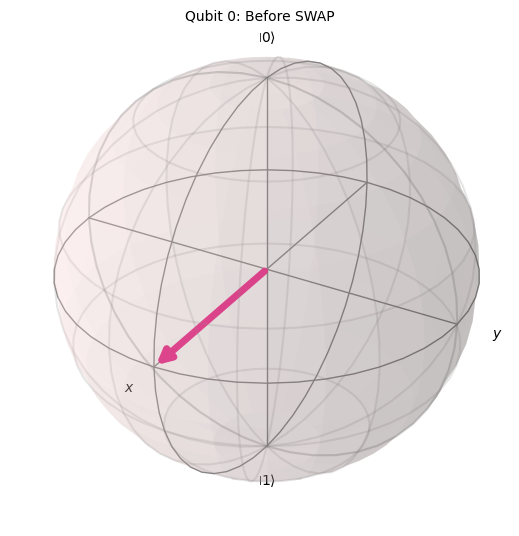

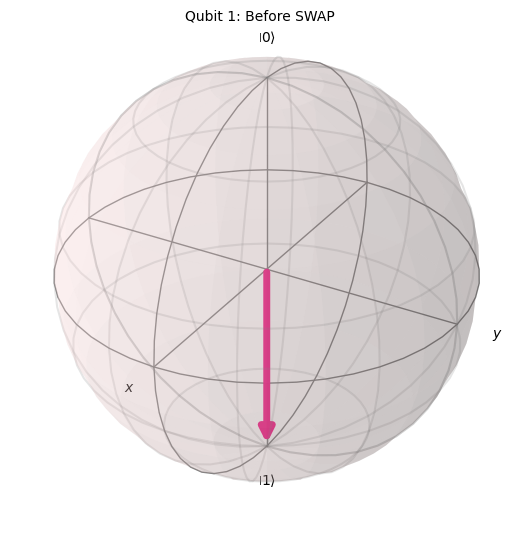

Bloch Spheres AFTER SWAP:


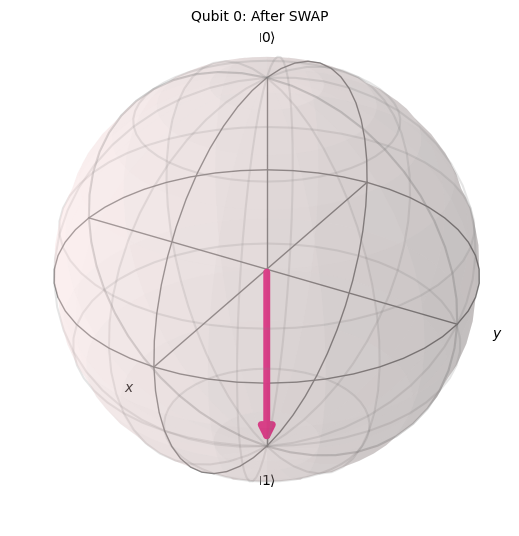

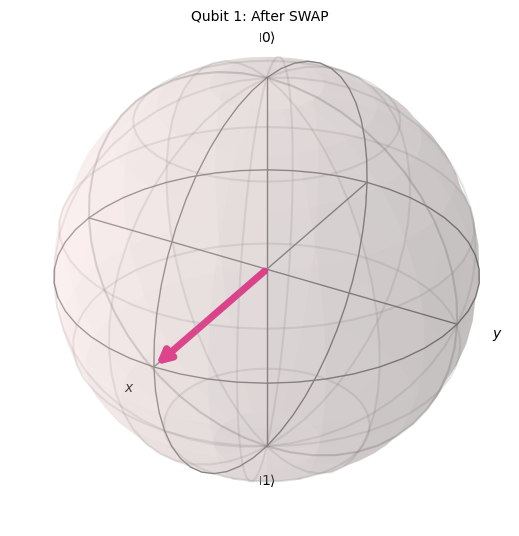

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

def get_bloch_vector(rho):
    x = 2 * np.real(rho[0, 1])
    y = 2 * np.imag(rho[1, 0])
    z = np.real(rho[0, 0] - rho[1, 1])
    return [x, y, z]

qc = QuantumCircuit(2)
qc.h(0)     # Qubit 0: |+⟩
qc.x(1)     # Qubit 1: |1⟩

sv = Statevector.from_instruction(qc)
rho0_before = partial_trace(sv, [1]).data  # Qubit 0
rho1_before = partial_trace(sv, [0]).data  # Qubit 1

bloch0_before = get_bloch_vector(rho0_before)
bloch1_before = get_bloch_vector(rho1_before)

print("Bloch Spheres BEFORE SWAP:")
display(plot_bloch_vector(bloch0_before, title="Qubit 0: Before SWAP"))
display(plot_bloch_vector(bloch1_before, title="Qubit 1: Before SWAP"))

qc.swap(0, 1)

sv_after = Statevector.from_instruction(qc)
rho0_after = partial_trace(sv_after, [1]).data
rho1_after = partial_trace(sv_after, [0]).data

bloch0_after = get_bloch_vector(rho0_after)
bloch1_after = get_bloch_vector(rho1_after)

print("Bloch Spheres AFTER SWAP:")
display(plot_bloch_vector(bloch0_after, title="Qubit 0: After SWAP"))
display(plot_bloch_vector(bloch1_after, title="Qubit 1: After SWAP"))


Dropdown(description='Select Circuit:', layout=Layout(width='60%'), options=('Hadamard + Measure', 'X Gate', '…

/usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/matplotlib.py:272: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(


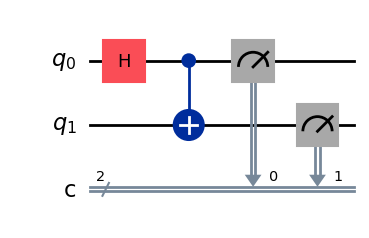

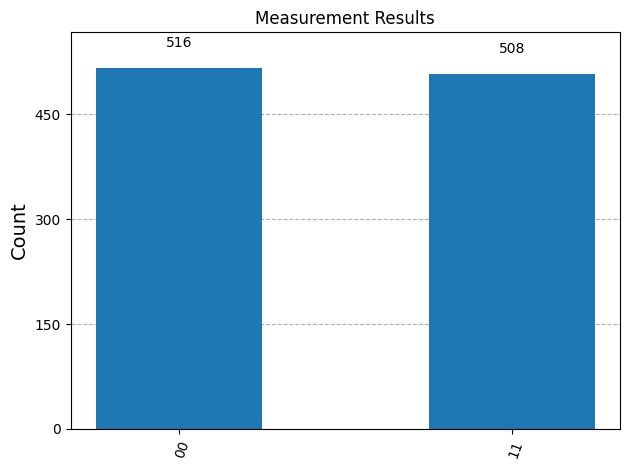

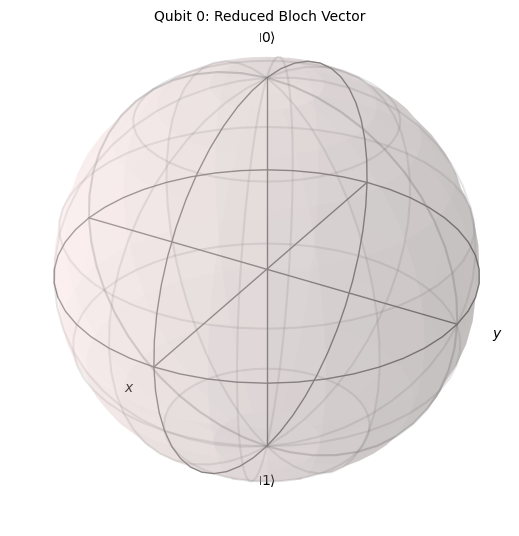

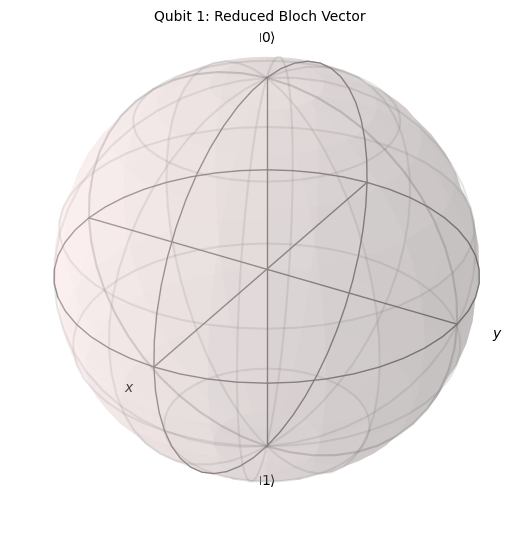

In [4]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector, circuit_drawer
from qiskit.quantum_info import partial_trace, Statevector
import matplotlib.pyplot as plt
import numpy as np

def get_bloch_vector(rho):
    x = 2 * np.real(rho[0, 1])
    y = 2 * np.imag(rho[1, 0])
    z = np.real(rho[0, 0] - rho[1, 1])
    return [x, y, z]

def create_circuit(choice):
    qc = None
    if choice == "Hadamard + Measure":
        qc = QuantumCircuit(1, 1)
        qc.h(0)
        qc.measure(0, 0)
    elif choice == "X Gate":
        qc = QuantumCircuit(1, 1)
        qc.x(0)
        qc.measure(0, 0)
    elif choice == "Bell State":
        qc = QuantumCircuit(2, 2)
        qc.h(0)
        qc.cx(0, 1)
        qc.measure([0, 1], [0, 1])
    elif choice == "GHZ State":
        qc = QuantumCircuit(3, 3)
        qc.h(0)
        qc.cx(0, 1)
        qc.cx(0, 2)
        qc.measure([0, 1, 2], [0, 1, 2])
    elif choice == "Superposition All":
        qc = QuantumCircuit(3, 3)
        qc.h([0, 1, 2])
        qc.measure([0, 1, 2], [0, 1, 2])
    elif choice == "CNOT":
        qc = QuantumCircuit(2, 2)
        qc.cx(0, 1)
        qc.measure([0, 1], [0, 1])
    elif choice == "SWAP":
        qc = QuantumCircuit(2, 2)
        qc.h(0)  # Put qubit 0 in |+⟩
        qc.x(1)  # Put qubit 1 in |1⟩
        qc.swap(0, 1)
        qc.measure([0, 1], [0, 1])
    return qc

def visualize_circuit_and_results(qc, choice):
    clear_output(wait=True)
    display(dropdown)
    display(circuit_drawer(qc, output='mpl'))

    sim = AerSimulator()
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title="Measurement Results"))

    num_qubits = qc.num_qubits

    if choice == "SWAP":

        pre_swap_qc = QuantumCircuit(2)
        pre_swap_qc.h(0)
        pre_swap_qc.x(1)


        sv_before = Statevector.from_instruction(pre_swap_qc)
        rho0_before = partial_trace(sv_before, [1]).data
        rho1_before = partial_trace(sv_before, [0]).data


        pre_swap_qc.swap(0, 1)
        sv_after = Statevector.from_instruction(pre_swap_qc)
        rho0_after = partial_trace(sv_after, [1]).data
        rho1_after = partial_trace(sv_after, [0]).data


        display(plot_bloch_vector(get_bloch_vector(rho0_before), title="Qubit 0: Before SWAP"))
        display(plot_bloch_vector(get_bloch_vector(rho1_before), title="Qubit 1: Before SWAP"))


        display(plot_bloch_vector(get_bloch_vector(rho0_after), title="Qubit 0: After SWAP"))
        display(plot_bloch_vector(get_bloch_vector(rho1_after), title="Qubit 1: After SWAP"))

    elif num_qubits == 1:

        sv = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))
        rho = sv.to_operator().data
        bloch_coords = get_bloch_vector(rho)
        display(plot_bloch_vector(bloch_coords, title="Bloch Sphere"))

    else:

        sv = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))
        reduced_rho = partial_trace(sv, list(range(1, num_qubits))).data
        bloch_coords = get_bloch_vector(reduced_rho)
        display(plot_bloch_vector(bloch_coords, title="Reduced Bloch Sphere of Qubit 0"))


dropdown = widgets.Dropdown(
    options=[
        "Hadamard + Measure",
        "X Gate",
        "Bell State",
        "GHZ State",
        "Superposition All",
        "CNOT",
        "SWAP"
    ],
    description='Circuit:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        qc = create_circuit(change['new'])
        if qc:
            visualize_circuit_and_results(qc, change['new'])

dropdown.observe(on_change)
display(dropdown)


Dropdown(description='Select Circuit:', index=6, layout=Layout(width='60%'), options=('Hadamard + Measure', 'X…

/usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/matplotlib.py:272: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(


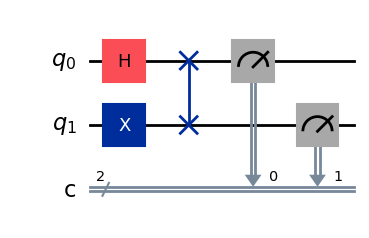

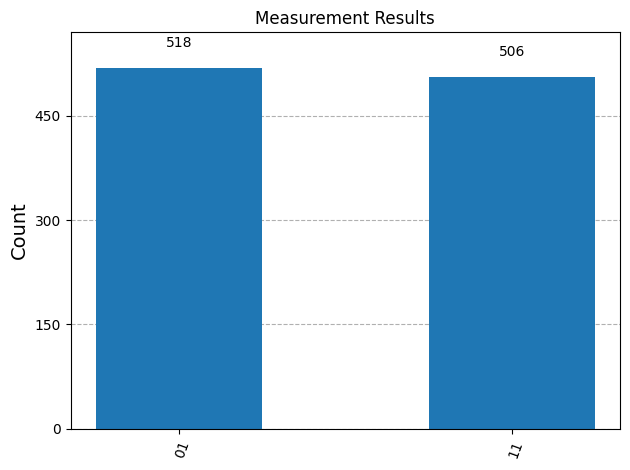

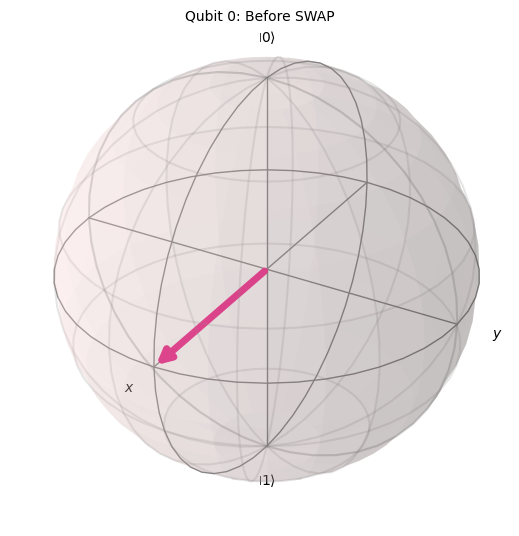

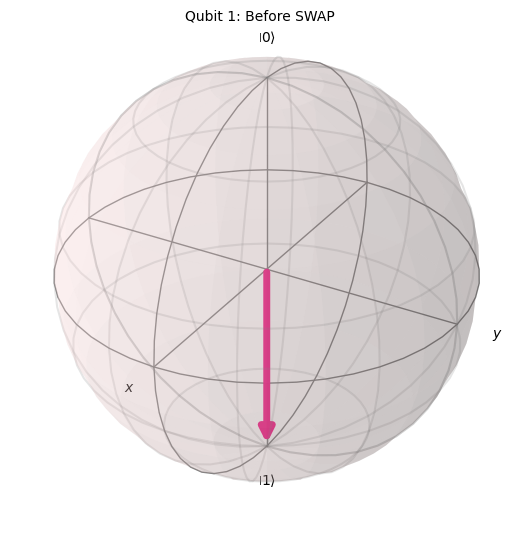

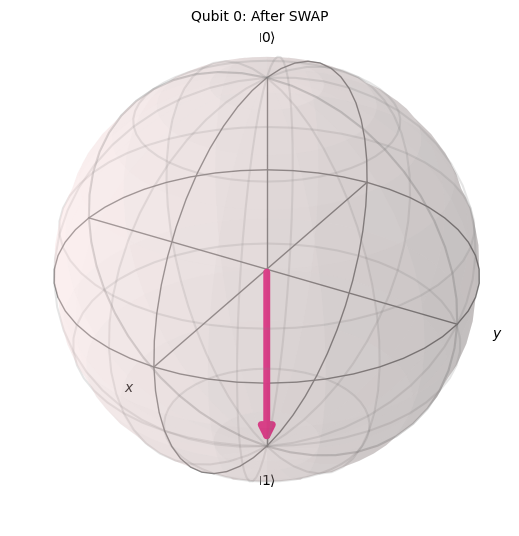

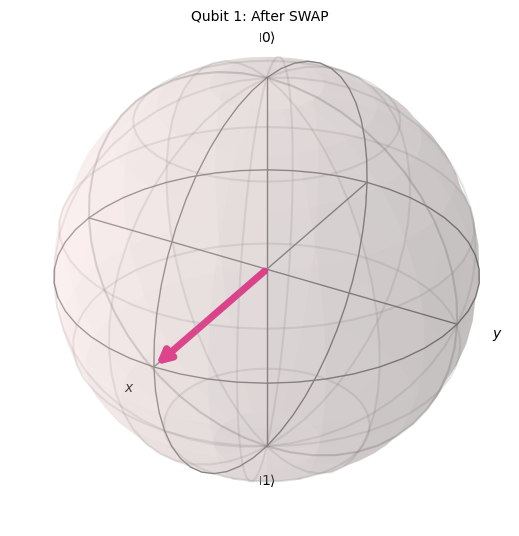

In [5]:
!pip install qiskit qiskit-aer --quiet

import ipywidgets as widgets
from IPython.display import display, clear_output
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector, circuit_drawer
from qiskit.quantum_info import Statevector, partial_trace
import matplotlib.pyplot as plt
import numpy as np

def get_bloch_vector(rho):
    x = 2 * np.real(rho[0, 1])
    y = 2 * np.imag(rho[1, 0])
    z = np.real(rho[0, 0] - rho[1, 1])
    return [x, y, z]


def create_circuit(choice):
    qc = None
    if choice == "Hadamard + Measure":
        qc = QuantumCircuit(1, 1)
        qc.h(0)
        qc.measure(0, 0)
    elif choice == "X Gate":
        qc = QuantumCircuit(1, 1)
        qc.x(0)
        qc.measure(0, 0)
    elif choice == "Bell State":
        qc = QuantumCircuit(2, 2)
        qc.h(0)
        qc.cx(0, 1)
        qc.measure([0, 1], [0, 1])
    elif choice == "GHZ State":
        qc = QuantumCircuit(3, 3)
        qc.h(0)
        qc.cx(0, 1)
        qc.cx(0, 2)
        qc.measure([0, 1, 2], [0, 1, 2])
    elif choice == "Superposition All":
        qc = QuantumCircuit(3, 3)
        qc.h([0, 1, 2])
        qc.measure([0, 1, 2], [0, 1, 2])
    elif choice == "CNOT":
        qc = QuantumCircuit(2, 2)
        qc.h(0)
        qc.cx(0, 1)
        qc.measure([0, 1], [0, 1])
    elif choice == "SWAP":
        qc = QuantumCircuit(2, 2)
        qc.h(0)
        qc.x(1)
        qc.swap(0, 1)
        qc.measure([0, 1], [0, 1])
    return qc


def visualize_circuit_and_results(qc, choice):
    clear_output(wait=True)
    display(dropdown)
    display(circuit_drawer(qc, output='mpl', style='iqx'))


    sim = AerSimulator()
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title="Measurement Results"))

    qc_nom = qc.remove_final_measurements(inplace=False)
    sv = Statevector.from_instruction(qc_nom)
    num_qubits = qc.num_qubits

    if choice == "SWAP":

        pre_swap_qc = QuantumCircuit(2)
        pre_swap_qc.h(0)
        pre_swap_qc.x(1)
        sv_before = Statevector.from_instruction(pre_swap_qc)
        rho0_before = partial_trace(sv_before, [1]).data
        rho1_before = partial_trace(sv_before, [0]).data
        pre_swap_qc.swap(0, 1)
        sv_after = Statevector.from_instruction(pre_swap_qc)
        rho0_after = partial_trace(sv_after, [1]).data
        rho1_after = partial_trace(sv_after, [0]).data

        display(plot_bloch_vector(get_bloch_vector(rho0_before), title="Qubit 0: Before SWAP"))
        display(plot_bloch_vector(get_bloch_vector(rho1_before), title="Qubit 1: Before SWAP"))
        display(plot_bloch_vector(get_bloch_vector(rho0_after), title="Qubit 0: After SWAP"))
        display(plot_bloch_vector(get_bloch_vector(rho1_after), title="Qubit 1: After SWAP"))

    elif num_qubits == 1:
        rho = sv.to_operator().data
        bloch_coords = get_bloch_vector(rho)
        display(plot_bloch_vector(bloch_coords, title="Bloch Sphere"))

    elif num_qubits > 1:
        for i in range(num_qubits):
            reduced_rho = partial_trace(sv, [j for j in range(num_qubits) if j != i]).data
            bloch_coords = get_bloch_vector(reduced_rho)
            display(plot_bloch_vector(bloch_coords, title=f"Qubit {i}: Reduced Bloch Vector"))


dropdown = widgets.Dropdown(
    options=[
        "Hadamard + Measure",
        "X Gate",
        "Bell State",
        "GHZ State",
        "Superposition All",
        "CNOT",
        "SWAP"
    ],
    description='Select Circuit:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        qc = create_circuit(change['new'])
        if qc:
            visualize_circuit_and_results(qc, change['new'])

dropdown.observe(on_change)
display(dropdown)


**PENNYLANE CODE**

In [6]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 109.4 MB/s eta 0:00:00


Dropdown(description='Quantum Circuit:', index=3, layout=Layout(width='50%'), options=('Hadamard + Measure', '…

/usr/local/lib/python3.12/dist-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


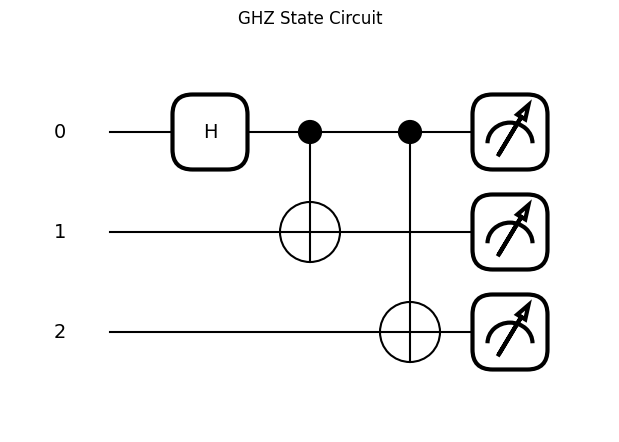

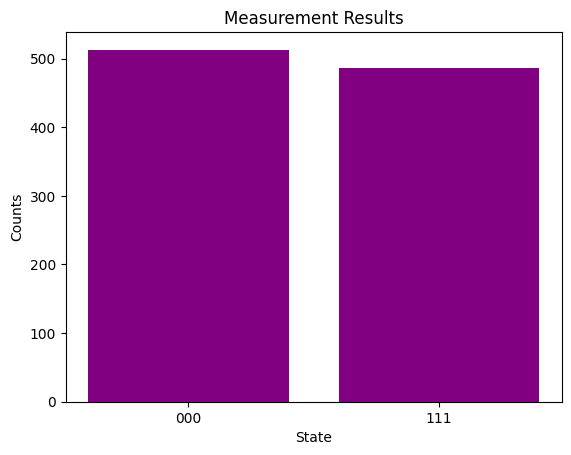

In [7]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def build_gate_sequence(choice):
    def gates():
        if choice == "Hadamard + Measure":
            qml.Hadamard(wires=0)
        elif choice == "X Gate":
            qml.PauliX(wires=0)
        elif choice == "Bell State":
            qml.Hadamard(wires=0)
            qml.CNOT(wires=[0, 1])
        elif choice == "GHZ State":
            qml.Hadamard(wires=0)
            qml.CNOT(wires=[0, 1])
            qml.CNOT(wires=[0, 2])
        elif choice == "Superposition All":
            qml.Hadamard(wires=0)
            qml.Hadamard(wires=1)
            qml.Hadamard(wires=2)
        elif choice == "CNOT":
            qml.CNOT(wires=[0, 1])
        elif choice == "SWAP":
            qml.Hadamard(wires=0)
            qml.PauliX(wires=1)
            qml.SWAP(wires=[0, 1])
    return gates

def run_sampling(choice, wires):
    dev = qml.device("default.qubit", wires=wires, shots=1000)

    @qml.qnode(dev)
    def circuit():
        build_gate_sequence(choice)()
        if choice in ["Bell State", "CNOT", "SWAP"]:
            return qml.counts(wires=[0, 1])
        elif choice in ["GHZ State", "Superposition All"]:
            return qml.counts(wires=[0, 1, 2])
        else:
            return qml.counts(wires=0)

    return circuit()

def visualize_pennylane(choice):
    clear_output(wait=True)
    display(dropdown_pl)

    wires = 3 if choice in ["GHZ State", "Superposition All"] else 2 if choice in ["Bell State", "CNOT", "SWAP"] else 1
    counts = run_sampling(choice, wires)

    # Draw Circuit
    dev_draw = qml.device("default.qubit", wires=wires)
    @qml.qnode(dev_draw)
    def draw_circuit():
        build_gate_sequence(choice)()
        return qml.state()

    qml.drawer.draw_mpl(draw_circuit)()
    plt.title(f"{choice} Circuit")
    plt.show()

    # Plot Histogram
    plt.bar(counts.keys(), counts.values(), color='purple')
    plt.title("Measurement Results")
    plt.xlabel("State")
    plt.ylabel("Counts")
    #plt.grid(True)
    plt.show()

dropdown_pl = widgets.Dropdown(
    options=["Hadamard + Measure", "X Gate", "Bell State", "GHZ State", "Superposition All", "CNOT", "SWAP"],
    description='Quantum Circuit:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        visualize_pennylane(change['new'])

dropdown_pl.observe(on_dropdown_change)
display(dropdown_pl)


**GOOGLE CIRQ CODE**

In [8]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.0 MB/s eta 0:00:00


Dropdown(description='Circuit:', index=4, layout=Layout(width='50%'), options=('Hadamard + Measure', 'X Gate',…

Circuit:
0: ───H───M───
          │
1: ───H───M───
          │
2: ───H───M───


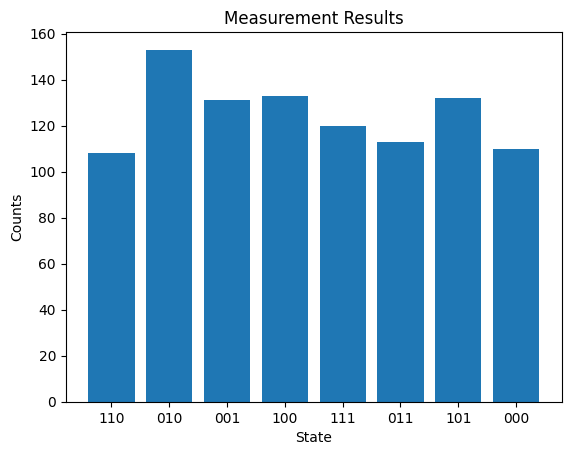

In [9]:
import cirq
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

def create_cirq_circuit(choice):
    q0, q1, q2 = cirq.LineQubit.range(3)
    circuit = cirq.Circuit()

    if choice == "Hadamard + Measure":
        circuit.append([cirq.H(q0), cirq.measure(q0)])
    elif choice == "X Gate":
        circuit.append([cirq.X(q0), cirq.measure(q0)])
    elif choice == "Bell State":
        circuit.append([cirq.H(q0), cirq.CNOT(q0, q1), cirq.measure(q0, q1)])
    elif choice == "GHZ State":
        circuit.append([cirq.H(q0), cirq.CNOT(q0, q1), cirq.CNOT(q0, q2), cirq.measure(q0, q1, q2)])
    elif choice == "Superposition All":
        circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2), cirq.measure(q0, q1, q2)])
    elif choice == "CNOT":
        circuit.append([cirq.CNOT(q0, q1), cirq.measure(q0, q1)])
    elif choice == "SWAP":
        circuit.append([cirq.H(q0), cirq.X(q1), cirq.SWAP(q0, q1), cirq.measure(q0, q1)])

    return circuit, [q0, q1, q2]

def visualize_cirq(choice):
    clear_output(wait=True)
    display(dropdown_cirq)

    circuit, qubits = create_cirq_circuit(choice)
    print("Circuit:")
    print(circuit)

    sim = cirq.Simulator()
    result = sim.run(circuit, repetitions=1000)
    result_dict = dict(result.histogram(key=','.join([str(q) for q in circuit.all_qubits()])))


    counts = {}
    for bits, freq in result_dict.items():
        bitstring = format(bits, f'0{len(circuit.all_qubits())}b')
        counts[bitstring] = freq

    plt.bar(counts.keys(), counts.values())
    plt.title("Measurement Results")
    plt.xlabel("State")
    plt.ylabel("Counts")
    plt.show()

dropdown_cirq = widgets.Dropdown(
    options=["Hadamard + Measure", "X Gate", "Bell State", "GHZ State", "Superposition All", "CNOT", "SWAP"],
    description='Circuit:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def on_change_cirq(change):
    if change['type'] == 'change' and change['name'] == 'value':
        visualize_cirq(change['new'])

dropdown_cirq.observe(on_change_cirq)
display(dropdown_cirq)
